In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
from scipy import stats
import seaborn as sns
from __future__ import division

In [3]:
data = pd.DataFrame({'GPA':[2.96,3.14,3.22,3.29,3.69,3.46,3.03,3.19,3.63,3.59,3.30,3.40,2.86,2.85,3.14,3.28,2.89,3.15,3.50,2.89], 'GMAT':[569,473,482,527,505,693,626,663,447,588,563,553,494,496,419,371,447,313,402,485],'Admitted':[1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0]})

In [6]:
X = data[['GPA','GMAT']].values
y = data['Admitted'].values

# a) 

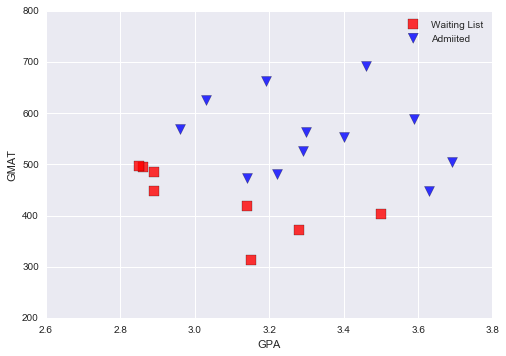

In [7]:
from matplotlib.colors import ListedColormap

colors = ('red','blue','lightgreen','gray','cyan')
cmap = ListedColormap(colors[:len(np.unique(y))])
markers = ('s', 'v', 'o', '^', 'v')

for idx,cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker = markers[idx], label=cl,s=100)
plt.legend(['Waiting List','Admiited'])
plt.ylabel('GMAT')
plt.xlabel('GPA')

# b)

In [9]:
from sklearn.linear_model import LinearRegression
mdl = LinearRegression(normalize=True)
mdl = mdl.fit(X,y)
mdl.coef_

array([ 0.8241807 ,  0.00336752])

In [10]:
#Plotting Decision Boundary
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx =None, resolution=0.01):
    #setup marker generator and colormap
    markers = ('s', 'v', 'o', '^', 'v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    #plot the decision surface 
    x1_min, x1_max = X[:,0].min() - 0.3, X[:,0].max() +0.3
    x2_min, x2_max = X[:,1].min() - 100, X[:,1].max() + 100
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),np.arange(x2_min,x2_max,resolution))
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    #plot all samples
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx),marker = markers[idx], label=cl,s=50)
    
    #highlight test samples
    if test_idx:
        x_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:,0],X_test[:,1],c='',alpha=1.0,linewidths=1,marker='o',label = 'test set')

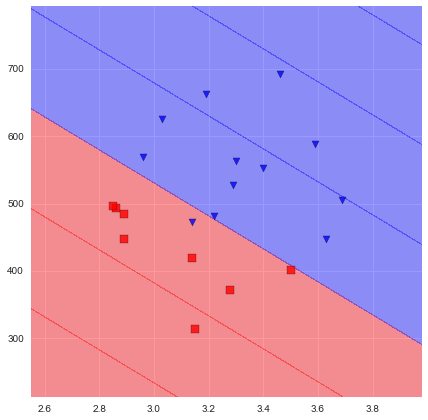

In [12]:
plt.rcParams['figure.figsize']=(7,7)
plot_decision_regions(X=X,y=y,classifier=mdl)
plt.show()


#  Discriminant Function:
# Z = 0.4832 (GPA) + 0.00197(GMAT)

In [13]:
# find invSW via S1 and S2
# S1 = sum(xi - mu_1)(xi- mu_1)t
x1 = X[:12,:]
x2 = X[12:,:]
mu_1 = np.mean(x1,axis=0)
mu_2 = np.mean(x2,axis=0)

In [22]:
x1_dif =  np.array([[x1[i,0] - mu_1[0],x1[i,1] - mu_1[1]] for i in range(12)])
x2_dif =  np.array([[x2[i,0] - mu_2[0],x2[i,1] - mu_2[1]] for i in range(8)])


In [15]:
S1 = np.matmul(x1_dif.T,x1_dif)
S2 = np.matmul(x2_dif.T,x2_dif)

In [16]:
SW = S1+S2

In [17]:
SW_inv = np.linalg.inv(SW)

In [18]:
mu_deff = mu_1 - mu_2

In [25]:
e = np.matmul(SW_inv,mu_deff)

In [26]:
z_new =  np.matmul(X,e)

In [27]:
plt.hist(z_new[:12])
plt.hist(z_new[12:])

(array([ 1.,  0.,  0.,  0.,  1.,  2.,  3.,  0.,  0.,  1.]),
 array([ 2.14042657,  2.17491616,  2.20940574,  2.24389533,  2.27838492,
         2.31287451,  2.34736409,  2.38185368,  2.41634327,  2.45083286,
         2.48532244]),
 <a list of 10 Patch objects>)

In [180]:
mean_z1 = np.mean(z_new[:12])
mean_z2 = np.mean(z_new[12:])


In [183]:
c_new = (mean_z1+mean_z2)/2
c_new

2.518616663739925

# Cut - off point : 2.5186

In [226]:
new_values = [[3.21,530],[3.26,664],[3.04,446],[3.00,509]]
for x in new_values:
    z = x[0]*e[0] + x[1]*e[1]
    print 1 / (1+np.exp(-z+c_new))

0.519816958707
0.590994671904
0.457919436003
0.48409311646


# c) What is the chance that an applicant with GPA of 3.21 and GMAT of 530 is admitted to the program?

# ANS: 51.99%


# d) What is the chance that an applicant with GPA of 3.26 and GMAT of 664 is waitlisted? 

# ANS: 48.9 %

# e) What is the chance that an applicant with GPA of 3.04 and GMAT of 446 is admitted to the program?

# ANS: 45.79 %

# f)  What is the chance that an applicant with GPA of 3.00 and GMAT of 509 is waitlisted? 

# ANS: 51.60 %